# Projet numérique : choix du pas de temps

## Pas fixe

#### Schéma d'ordre 1 : Euler explicite

La première étape fut de coder le schéma d'Euler explicite à un pas de temps $dt$ constant. Notre fonction renvoie les vecteurs des temps $t^j$ et $x^j$. 



In [104]:
from matplotlib import pyplot as plt
import numpy as np
import random as rd
%matplotlib notebook

In [105]:
#solve euler
def solve_euler_explicit(f, dt, tf, x0, t0 = 0):
    x = [x0]
    t = [t0]
    while t[-1] < tf :
        x.append(x[-1]+dt*f(t[-1],x[-1]))
        t.append(t[-1]+dt)
    t = np.array(t)
    x = np.array(x)
    return t, x

Appliquons notre schéma à une équation du type $\dot x = f(x)$. Pour notre application, nous avons choisi l'équation différentielle suivante : $\dot x = x $.  

<IPython.core.display.Javascript object>


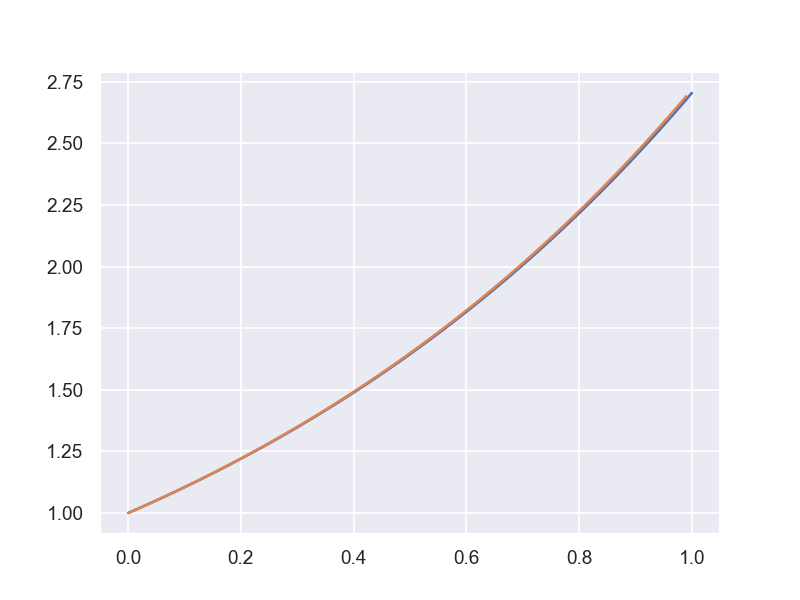

In [106]:
#définition de la fonction f(x,t)
def f(t,x):
    return x

#application
T, X = solve_euler_explicit(f,10**-2,1,1,0)

#plot
plt.plot(T,X)
u = np.arange(0,1,10**-2)
g = np.exp(u)

plt.plot(u,g)

On remarque une convergence entre la solution exacte (dont la fonction est $g$) et notre méthode. 
La prochaine étape est d'illustrer cette convergence à l'ordre 1. Pour cela, nous créons une fonction err qui pour chaque pas de temps renvoie la différence maximale entre la solution exacte et la solution renvoyée par le schéma d'Euler explicite. 

In [108]:
#interprétation de l'erreur

def max_err(f, dt, tf, x0, t0, g, method):
    """erreur maximale"""
    t, x_euler = method(f, dt, tf, x0, t0)
    x_exact = g(t)
    L = []
    for k in range(len(t)):
        L.append(np.abs(x_exact[k] - x_euler[k]))
    return max(L)

In [109]:
#plot de l'erreur pour un pas donné

def g(t):
    return np.exp(t)
max_err(f, 10**-2, 1, 1, 0, g, solve_euler_explicit)

0.01346799903752105

Nous avons par la suite souhaité avoir l'erreur en fonction du pas de temps choisi. Ceci nous permettait d'interpréter l'odre associé à l'erreur.

<IPython.core.display.Javascript object>


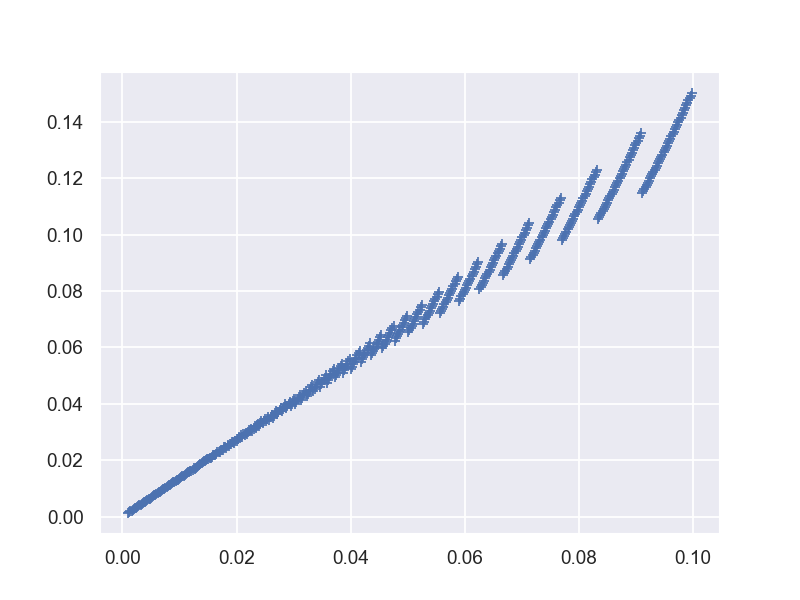

In [111]:
#erreur en fonction du pas de temps
def ordre_err(dt_min, dt_max, n, f, t0, tf, x0, g, method):
    X = [dt_min + (dt_max - dt_min)/n *k for k in range(n)]
    Y = [max_err(f, dt, tf, x0, t0, g, method) for dt in X]
    return X,Y
    
X,Y = ordre_err(10**-3, 10**-1, 500, f, 0, 1, 1, g, solve_euler_explicit)
plt.plot(X,Y,"+")

Observations : 
    L'erreur suit bien la courbe d'une fonction affine. Ceci illustre donc bien la convergence du schéma en ordre 1.

#### Schéma d'ordre 2 : Runge-Kutta 2

Nous allons faire de même avec un schéma d'ordre 2. Nous avons choisi pour cela la méthode Runge-Kutta d'ordre 2. Cette méthode a le schéma itératif suivant :
$$ x_{n+1}= x_n + \frac{dt}{2} (k_1 + k_2) $$

avec $k_1 = f(t_n,x_n)$ 
et $k_2 = f(t_n + dt, x_n + dtk_1)$


In [112]:
# methode RK2 et convergence
def solve_rk2(f, dt, tf, x0, t0):
    """schéma Runge-Kutta 2"""
    x = [x0]
    t = [t0]
    while t[-1] < tf :
        k1 = f(t[-1], x[-1])
        k2 = f(t[-1] + dt, x[-1] + dt * k1)
        x.append(x[-1] + dt/2 * (k1 + k2))
        t.append(t[-1] + dt)
    t = np.array(t)
    x = np.array(x)
    return t, x

<IPython.core.display.Javascript object>


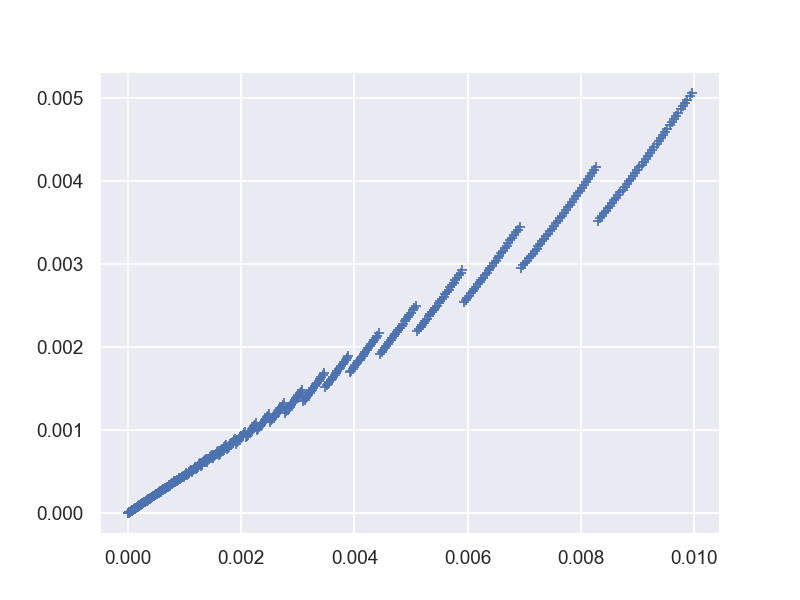

In [113]:
#affichage de l'erreur en fonction du pas de temps pour le schéma Runge-Kutta 2
X,Y = ordre_err(10**-3, 10**-1, 500, f, 0, 1, 1, g, solve_rk2)
X = array(X)
Y = array(Y)
plt.plot(X**2,Y,"+")

Observations :
Nous obtenons bien une erreur linéaire en le pas de temps au carré : il s'agit bien d'un schéma d'ordre 2.

## Adaptation du pas de temps 

On s'intéresse à l'approximation de l'équation différentielle $\dot x = f(t,x)$ (E) via l'utilisation d'un schéma d'Euler explicite. 

Ainsi on a : $$
    x^{j+1} = x^{j} + \Delta t_{j}\ f(t_{j},x^{j}) $$

Considérons $x$ solution de (E) telle que $x(t_{j}) = x^{j}$
On définit : $$
    e^{j+1} = x^{j} + \int_{t_{j}}^{t_{j+1}} f(s,x(s))ds - x^{j+1} = \int_{t_{j}}^{t_{j+1}} f(s,x(s))ds - \Delta t_{j}\ f(t_{j},x^{j})$$

$\textbf{Question 1 :}$

Montrons que si $f$ est $C^1$, on a pour un schéma d’Euler explicite :
$$
 \|e^{j+1}\| = \Delta t_{j}\ \frac{\big\|f(t_{j+1},x^{j+1}) - f(t_j,x^j)\big\|}{2} + o(\Delta t_{j}^2)
$$
On reconnaît là une légère variation de l'erreur associée à la méthode des trapèzes pour l'approximation d'une intégrale d'une fonction de classe $C^1$.

Montrons comme premier résultat : 
$$
    \int_{t_{j}}^{t_{j+1}} f(s,x(s))ds = \frac{f(t_{j+1},x(t_{j+1})) + f(t_{j},x(t_{j}))}{2} \ \Delta t_{j} +o(\Delta t_{j}^{2})
$$
On a : $$
    \int_{t_{j}}^{t_{j+1}} f(s,x(s))ds - \frac{f(t_{j+1},x(t_{j+1})) + f(t_{j},x(t_{j}))}{2} \ \Delta t_{j} = \int_{t_{j}}^{t_{j+1}} f(s,x(s)) - \frac{f(t_{j+1},x(t_{j+1})) + f(t_{j},x(t_{j}))}{\Delta t_{j}}(s - t_{j})ds$$

Notons $ \phi : t \mapsto f(t,x(t)) $


Or f est $C^1$ donc par formule de Taylor-Young il existe $\epsilon$ tel que $\lim\limits_{t \rightarrow t_{j}} \epsilon(t) = 0$ et $$\forall x \in [t_{j},t_{j+1}]\ \ \ \ \  \phi(t) = \phi(t_{j}) + (\phi'(t_{j}) + \epsilon(t))(t-t_{j})$$

Ainsi : 

$$ \int_{t_{j}}^{t_{j+1}} f(s,x(s))ds - \frac{f(t_{j+1},x(t_{j+1})) + f(t_{j},x(t_{j}))}{2} \ \Delta t_{j} = \int_{t_{j}}^{t_{j+1}}(s-t_{j}) (\phi'(t_{j}) - \frac{f(t_{j+1},x(t_{j+1})) - f(t_{j},x(t_{j}))}{\Delta t_{j}} + \epsilon(s))ds$$

Soit $\delta > 0$. Par définition de la dérivée d'une fonction et de la limite, en se plaçant suffisamment proche de $t_{j}$ par la droite on obtient un voisinage $ V \subset [t_{j},t_{j+1}]$ tq $\forall t \in V$ :

$$  \| \epsilon(t) \| < \delta/2$$ et :
$$ \| \phi'(t_{j}) - \frac{f(t,x(t)) - f(t_{j},x(t_{j}))}{\Delta t_{j}} \| < \delta/2 $$

Ainsi, pour $ t \in V$ :

$$ \| \int_{t_{j}}^{t_{j+1}} f(s,x(s))ds - \frac{f(t_{j+1},x(t_{j+1})) + f(t_{j},x(t_{j}))}{2} \ \Delta t_{j} \| < \int_{t_{j}}^{t_{j+1}} \delta (s - t_{j}) ds = \delta \frac{\Delta t_{j}^2}{2}$$

On a donc bien montré que : 

$$\int_{t_{j}}^{t_{j+1}} f(s,x(s))ds = \frac{f(t_{j+1},x(t_{j+1})) + f(t_{j},x(t_{j}))}{2} \ \Delta t_{j} +o(\Delta t_{j}^{2})$$

On en déduit donc que : 

$$e^{j+1} = \frac{f(t_{j+1},x(t_{j+1})) - f(t_{j},x(t_{j}))}{2} \ \Delta t_{j} +o(\Delta t_{j}^{2}) \ \ \textbf{(*)}$$

Toutefois, bien qu'on ait $x(t_{j}) = x^{j}$, nous n'avons pas forcément $x(t_{j+1}) = x^{j+1}$, sans quoi le problème serait terminé en composant la relation précédente par la norme $\|.\|$. Intéressons nous  à la différence $f(t_{j+1},x(t_{j+1}))-f(t_{j+1},x^{j+1})$. 

Comme $f$ est de classe $C^1$ : 

$$ f(t_{j+1},x(t_{j+1}) - f(t_{j+1},x^{j+1}) = \frac{\partial f}{\partial x}(t_{j+1},x^{j+1})(x(t_{j+1})-x^{j+1}) + O((x(t_{j+1})-x^{j+1})^2) $$

De plus par (E), on remarque que f de classe $C^1$ implique $x$ de classe $C^2$. Il existe donc $\varrho$ bornée telle que :

$$x(t_{j+1}) = x(t_{j}) + x'(t_{j}) \Delta t_{j} + \varrho(\Delta t_{j}) \Delta t_{j}^2 $$

Or on reconnaît ici l'expression de $x^{j+1} = x(t_{j}) + x'(t_{j}) \Delta t_{j} $ donnée par le schéma d'Euler explicite. On a donc :

$$x(t_{j+1}) = x^{j+1} + \varrho(\Delta t_{j}) \Delta t_{j}^2 $$

Ainsi, en considérant le caractère borné sur tout segment de la fonction continue $\frac{\partial f}{\partial x}$ : 

$$f(t_{j+1},x(t_{j+1}) = f(t_{j+1},x^{j+1}) + \frac{\partial f}{\partial x}(t_{j+1},x^{j+1})\varrho(\Delta t_{j}) \Delta t_{j}^2 + O(\Delta t_{j}^2) = f(t_{j+1},x^{j+1}) + O(\Delta t_{j}^2) $$

Par réinjection de cette relation dans $\textbf{(*)}$ : 

$$e^{j+1} = \frac{f(t_{j+1},x^{j+1}) + O(\Delta t_{j}^2) - f(t_{j},x^{j})}{2} \ \Delta t_{j} +o(\Delta t_{j}^{2}) =  \frac{f(t_{j+1},x^{j+1}) - f(t_{j},x^{j})}{2} \ \Delta t_{j} +o(\Delta t_{j}^{2}) $$

Finalement on a bien : 

$$\|e^{j+1}\| =  \frac{\|f(t_{j+1},x^{j+1}) - f(t_{j},x^{j})\|}{2} \ \Delta t_{j} +o(\Delta t_{j}^{2})$$

$\textbf{Question 2 :}$

Tout d'abord montrons que $e^{j+1} = O(\Delta t_{j}^{2})$. On utilise rappelle la relation $(*)$ : 

$$e^{j+1} = \frac{f(t_{j+1},x(t_{j+1})) - f(t_{j},x(t_{j}))}{2} \ \Delta t_{j} +o(\Delta t_{j}^{2}) \ \ \textbf{(*)}$$

Ainsi :

$$\frac{e^{j+1}}{\Delta t_{j}^{2}} = \frac{f(t_{j+1},x(t_{j+1})) - f(t_{j},x(t_{j}))}{2\Delta t_{j}} = \frac{\dot{x}(t_{j}+\Delta t_{j})-\dot{x}(t_{j})}{2\Delta t_{j}}$$

Comme $x$ est de classe $C^2$ donc $D^2$, en reconnaissant l'expression d'une dérivée, on a : 

$$\frac{e^{j+1}}{\Delta t_{j}^{2}} = \frac{\ddot{x}(t_{j})}{2} + o(1) \implies e_{j+1} = \frac{\ddot{x}(t_{j})}{2}\Delta t_{j}^2 +o(\Delta t_{j}^2) \implies e_{j+1} = O(\Delta t_{j}^2) $$

De plus la relation la précédente nous donne : 

$$e^{j+1}(\Delta t_{j}) \sim  \frac{\ddot{x}(t_{j})}{2}\Delta t_{j}^2 $$

Et nous incite à poser $\Delta t_{new}$ tel que :

$$\frac{\|\ddot{x}(t_{j})\|}{2}\Delta t_{new}^2 = Tol_{abs}$$

Or :

$$\frac{\|\ddot{x}(t_{j})\|}{2} \approx \frac{\|e_{j+1}\|}{\Delta t_{j}^2} $$

Finalement, on a bien, en prenant une "marge de sécurité" rendue nécessaire par l'approximation précédente :

$$\Delta t_{new} = \Delta t_{j} \sqrt{\frac{Tol_{abs}}{\|e_{j+1}\|}} $$

$\textbf{Question 3 :}$

On s'intéresse au solveur fourni sur GitHub, dont voici le code, que nous avons commenté :

In [114]:
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib; 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Ce solveur permet à chaque étape d'approximation de la solution associée à l'équation différentielle $\dot{x}(t) = f(x,t)$ un contrôle de l'erreur. En effet à chaque étape l'erreur est estimée et le pas de temps est adapté en conséquence. Le pas de temps est défini tel qu'à tout moment : $dt_{min} < dt < dt_{max}$. De plus, l'échantillonage de la solution est réalisé 

In [115]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(t, x)
            x_back = x_next - dt * f(t_next, x_next)
            ratio_abs_error = atol / (np.linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(t, x)
        ts += [t_next]
        xs += [x_next]
        t, ti, x = t_next, ti_next, x_next
    return ts, xs

Décrivons le fonctionnement de l'algorithme :

    * Variables utilisées : 
        - ts,xs sont les tableaux correspondant à l'approximation de la solution
        - t parcourt l'intervalle [t0, t_f], au fur et à mesure de l'approximation de la solution
        - ti lui appartient toujours à [0, dtmax], il correspond au temps écoulé depuis le dernier enregistrement d'un point associé à la solution
        
    * Déroulement de l'algorithme : 
        - La première boucle assure juste que la résolution de l'équation différentielle s'effectue sur l'ensemble de l'intervalle [t0,tf] : tant que la dernière valeur de ts est plus petite que tf, on continue à éxecuter la résolution
        - La deuxième boucle, elle s'éxecute tant que ti n'a pas atteint la valeur d'échantillonage dtmax
        
On commence avec un pas initial défini arbitrairement et valant $\frac{dt_{max}}{10}$. A chaque étape on obtient tout d'abord un premier point $x_{next}$ avec la méthode d'Euler appliquée au point inital. Puis on revient en arrière depuis $x_{next}$, cette fois-ci avec la méthode d'Euler appliquée au point $x_{next}$ afin d'obtenir le point $x_{back}$. La connaissance de $x_{next}$ et $x_{back}$ nous permet de calculer l'erreur $e_{j+1}$. 
A l'aide de la formule obtenue à la question précédente on obtient alors le nouveau pas de temps, adapté au contrôle de l'erreur : $dt = \Delta t_{new}$.

Notons qu'on a un double contrôle sur $dt$ tel qu'à tout moment $dt \in [dtmin, dtmax]$. Si $dt < dtmin$ on lève une erreur et arrête l'algorithme afin de garantir la terminaison de ce dernier : une diminue infinie de dt pourrait faire que l'algorithme reste "coincé" au voisinage d'un point, cf phénomènes raides. De plus si $dt > \frac{dt_{max}}{2}$ on lui donne la valeur $\frac{dt_{max}}{2}$ afin qu'à tout moment on se trouve bien dans $[ts[-1], ts[-1] + dt_{max}]$. 

Ainsi, on avance petit à petit en appliquant ce processus jusqu'au dernier point où $t_{i}$ ne doit pas excéder $dt_{max}$. On applique alors la méthode d'Euler en choisissant le pas $dt2DT$, temps restant entre $t_{i}$ et $t_{max}$ et défini tel que l'erreur ne dépasse pas $Tol_{abs}$.




$ \textbf{Test de l'algo :}$

On s'intéresse au problème de Cauchy : $\dot{y}(t) = y*cos(t) + e^{sin(t)}, y(0) = 1$ de solution $y(t) = e^{sin(t)}(1+t)$

In [116]:
import time

<IPython.core.display.Javascript object>


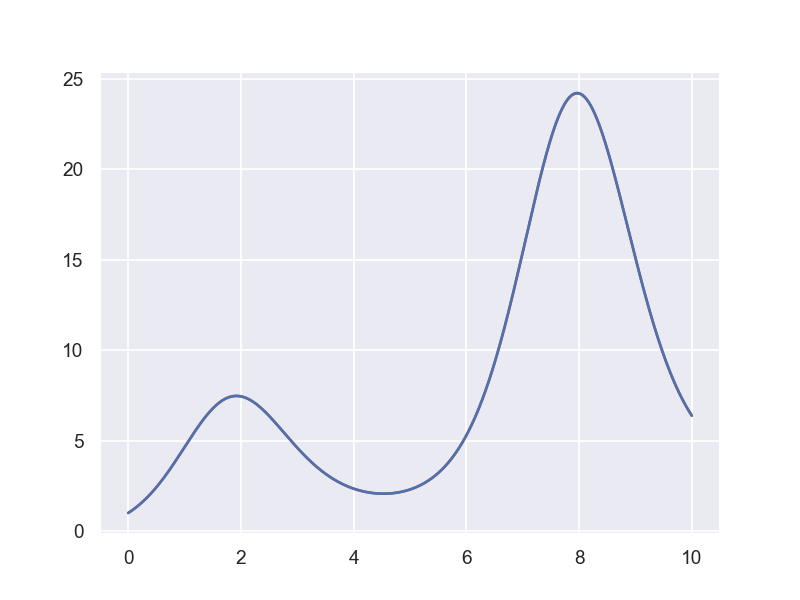

In [117]:
t0=0
tf=10
x0=1

def f1(t, x):
    return x * cos(t) + exp(sin(t))

start_time=time.time()
T, X = solve_ivp_euler_explicit_variable_step(f1,t0, x0, tf)
plt.plot(T,X,color='r')
A = linspace(0,10,1000)
def g(t):
    return exp(sin(t))*(1+t)
B = g(A)
plt.plot(A,B,color='b')

Le résultat est tout à fait cohérent en première observation, maintenant quantifions l'erreur : 

<IPython.core.display.Javascript object>


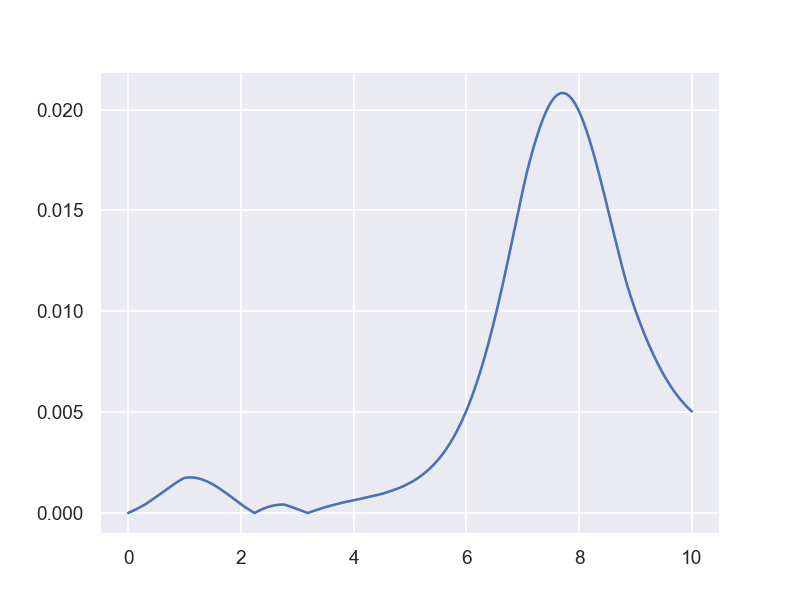

In [118]:
def calc_err(f1,t0,x0,tf):
    ERR = []
    for k in range(len(T)):
        ERR.append(abs(X[k]-g(T[k])))
    return ERR

ERR = calc_err(f1,t0,x0,tf)
plt.plot(T,ERR)

Puis quantifions l'erreur associée à l'algorithme itérant un schéma d'Euler explicite à pas fixe.

<IPython.core.display.Javascript object>


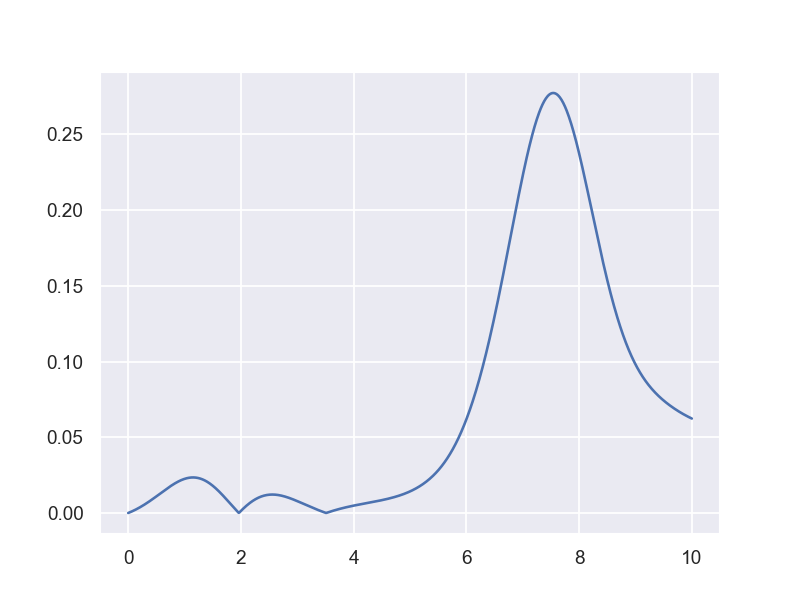

In [119]:
tbis, xbis = solve_euler_explicit(f1, 0.01, 10, 1, t0 = 0)

def calc_err_bis(f1,t0,x0,tf):
    ERR = []
    for k in range(len(T)):
        ERR.append(abs(xbis[k]-g(T[k])))
    return ERR

ERRbis = calc_err_bis(f1,t0,x0,tf)

plt.plot(T,ERRbis)

On remarque que la précision y est approximativement 10 fois meilleure. Les résultats sont tout à fait satisfaisants.

Bilan : 
    
La méthode d'Euler à pas variable est très intéressante : elle permet des résultats bien meilleurs qu'Euler à pas fixe égal à dt_max. De plus, bien qu'elle soit plus lente (Euler à pas fixe égal à dt_max s'éxecute ici quasi instantanément alors qu'Euler à pas variable nécessite quelques dizièmes de secondes), elle permet en réalité un gain de temps considérable : pour obtenir une telle précision avec un pas fixe on aurait dû le prendre très petit et ainsi perdre énormément de temps sur les zones où la fonction possède de faibles variations.

$\textbf{Allyriane Jousse Della Giustina & Elie Lesec}$